<a href="https://colab.research.google.com/github/Jatansahu/woc5.0-ml-weather-prediction-case-study-jatan-sahu/blob/main/WOC5_0_ML_Checkpoint_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#APPLYING K-NEAREST NEIGHBORS MODEL IN WEATHER DATASET


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
df = pd.read_csv("https://raw.githubusercontent.com/Jatansahu/woc5.0-ml-weather-prediction-case-study-jatan-sahu/DATASETS/CHECKPOINT05_WEATHER_DATA.csv")

In [92]:
df

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


In [94]:
#Plotting scatter plot
#plt.scatter(df['temp_max'],df[''])

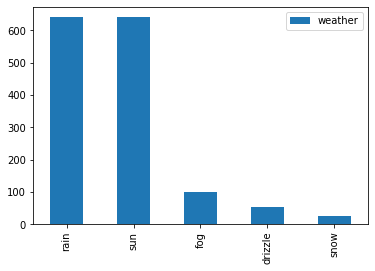

In [95]:
df_count=pd.DataFrame(df['weather'].value_counts())
df_count.plot(kind='bar')

In [96]:
# df1=df.loc[df.weather =='rain']
# df2=df.loc[df.weather =='sun']
# df3=df.loc[df.weather =='fog']
# df4=df.loc[df.weather =='drizzle']
# df5=df.loc[df.weather =='snow']


In [97]:
#Normalizing data
from sklearn.preprocessing import MinMaxScaler


In [100]:
scaler = MinMaxScaler()
d=scaler.fit_transform(df[["precipitation" , "temp_max" , "temp_min" , "wind"]])
scaled_df = pd.DataFrame(d)
scaled_df.columns=["precipitation" , "temp_max" , "temp_min" , "wind"]
scaled_df["weather"]=df["weather"]

scaled_df.head()


,precipitation,temp_max,temp_min,wind,weather
0,0.000000,0.387097,0.476378,0.472527,drizzle
1,0.194991,0.327957,0.389764,0.450549,rain
2,0.014311,0.357527,0.562992,0.208791,rain
3,0.363148,0.370968,0.500000,0.472527,rain
4,0.023256,0.282258,0.389764,0.626374,rain


In [101]:
df1=scaled_df.loc[scaled_df.weather =='rain']
df2=scaled_df.loc[scaled_df.weather =='sun']
df3=scaled_df.loc[scaled_df.weather =='fog']
df4=scaled_df.loc[scaled_df.weather =='drizzle']
df5=scaled_df.loc[scaled_df.weather =='snow']


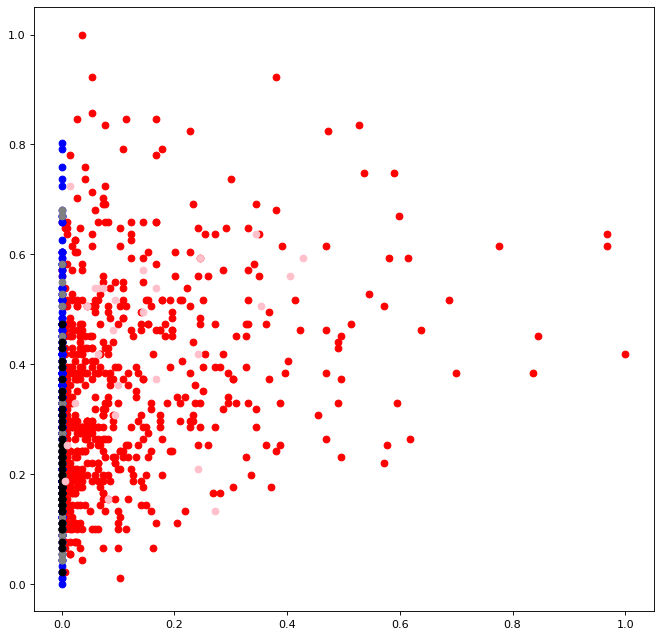

In [115]:
plt.figure(figsize=(10,10), dpi=80 )

plt.scatter(df1['precipitation'],df1['wind'], color= 'red' )
plt.scatter(df2['precipitation'],df2['wind'], color= 'blue')
plt.scatter(df3['precipitation'],df3['wind'], color= 'grey')
plt.scatter(df4['precipitation'],df4['wind'], color= 'black')
plt.scatter(df5['precipitation'],df5['wind'], color= 'pink')

In [40]:
from sklearn import preprocessing

In [45]:
#pip install category_encoders

In [43]:
from category_encoders import OrdinalEncoder

In [47]:
mapping = [{'col': 'weather', 'mapping': {"rain": 1,  "sun": 2, "fog": 3 , "drizzle": 4 , "snow": 5}}]
df =OrdinalEncoder(cols=['weather'], mapping=mapping).fit(df).transform(df)
df

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,4
1,10.9,10.6,2.8,4.5,1
2,0.8,11.7,7.2,2.3,1
3,20.3,12.2,5.6,4.7,1
4,1.3,8.9,2.8,6.1,1
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,1
1457,1.5,5.0,1.7,1.3,1
1458,0.0,7.2,0.6,2.6,3
1459,0.0,5.6,-1.0,3.4,2


In [49]:
input = df.drop(columns = 'weather')


In [50]:
target = df['weather']

In [46]:
#Importing packages for modeling
from sklearn.model_selection import train_test_split

In [51]:
#traning : testing = 80: 20
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=10)

In [52]:
len(X_train)

1168

In [53]:
len(X_test)

293

In [ ]:
#Plotting scatter plot


#Importing packages for KNN
from sklearn.neighbors import Nearest

In [117]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train , y_train)


KNeighborsClassifier(n_neighbors=3)

In [118]:
knn.score(X_test , y_test)

0.7713310580204779

In [124]:
!pip install matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#CONFUSION MATRIX

In [131]:
from sklearn.metrics import confusion_matrix




In [137]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

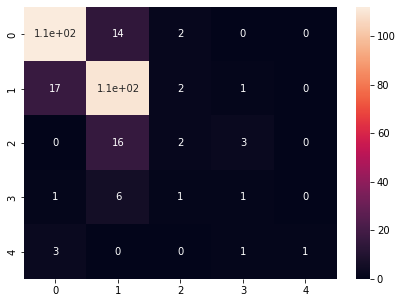

In [138]:
%matplotlib inline
import seaborn as sn
plt.figure(figsize =(7,5))
sn.heatmap(cm , annot = True)


In [139]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.84      0.88      0.86       128
           2       0.75      0.85      0.80       130
           3       0.29      0.10      0.14        21
           4       0.17      0.11      0.13         9
           5       1.00      0.20      0.33         5

    accuracy                           0.77       293
   macro avg       0.61      0.43      0.45       293
weighted avg       0.74      0.77      0.75       293

